# Práctica Machine Learning

## Resumen del archivo
En este documento se encuentra el estudio y desarrollo de uno o varios modelos de Machine Learning sobre una base de datos de AirBnB siguiendo la metodología y prácticas vistas en clase de bootcamp
Paquetes instalados:
- numpy
- pandas
- matplotlib
- sklearn

## Índice de contenidos
1. [Instalación de paquetes](#Instalacion)
2. [Cargar y limpieza de datos](#Cargar)
3. [Análisis de datos](#Analisis)

4. Modificación de datos
5. Modelado
6. Conclusión
7. Detalles


### Instalacion

In [265]:
#pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit_learn
#!pip install seaborn

In [2]:
# Instalación de paquetes

#instalación numpy
import numpy as np

#importar pandas
import pandas as pd

#importar matplot
import matplotlib.pyplot as plt
%matplotlib inline

#importar sklearn
import sklearn as sk

### Cargar

In [112]:
from sklearn.model_selection import train_test_split
# Incluyo dataset
airbnb = pd.read_csv("airbnb-listings-extract.csv", header=0, sep=";", decimal=".")
train, test = train_test_split(airbnb, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv("airbnb-listings-train.csv", sep=';', decimal='.', index=False)
test.to_csv("airbnb-listings-test.csv", sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

airbnb.head(5).T


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [113]:
airbnb.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [115]:
# Elimino columnas que no puedo estudiar o no necesito
# Elimino columnas que no puedo estudiar o no necesito
airbnb_drop = airbnb.drop(["ID", "Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Host URL", "Host About", "Host Response Time",
                            "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules",
                            "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host Name", "Host Since",
                            "Host Location", "Host Thumbnail Url", "Host Neighbourhood", "Host Verifications", "Street",
                            "Neighbourhood", "Neighbourhood Cleansed", "State", "Country Code", "Latitude", "Longitude",
                            "Square Feet", "Weekly Price", "Monthly Price", "Has Availability", "Calendar last Scraped", "First Review",
                            "First Review", "Last Review", "License", "Jurisdiction Names", "Geolocation", "Neighbourhood",
                            "Host Picture Url", "Availability 30", "Availability 60", "Availability 90", "Review Scores Accuracy",
                            "Host Acceptance Rate", "Smart Location", "Zipcode", "City", "Amenities", "Calendar Updated", "Security Deposit",
                            "Host Listings Count", "Cleaning Fee", "Calculated host listings count", "Features", "Market", "Neighbourhood Group Cleansed",
                            "Host Response Rate", "Experiences Offered", "Minimum Nights", "Maximum Nights", "Host Total Listings Count"
                            ,"Cancellation Policy"], axis=1)
#, "Reviews per Month" , "Number of Reviews", "Review Scores Rating",
                            #"Review Scores Cleanliness", "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", "Review Scores Value",
                            

In [105]:

#Análisis técnico inicial de las columnas
for cols in airbnb_drop.columns:
    print(f"Análisis de la columna: {cols}")
    print("Número de valores únicos:", len(airbnb_drop[cols].unique()))
    print("Filas:", airbnb_drop[cols].count())
    print("Es de tipo:", airbnb_drop[cols].dtype)
    print("Cantidad de NaN:", airbnb_drop[cols].isna().sum())
    print("Porcentaje de datos faltantes: {:.2f} %".format((airbnb_drop[cols].isna().sum() / airbnb_drop.shape[0]) * 100))
    print(airbnb_drop[cols].value_counts())
    print("-" * 40)
    

    


Análisis de la columna: Country
Número de valores únicos: 18
Filas: 14779
Es de tipo: object
Cantidad de NaN: 1
Porcentaje de datos faltantes: 0.01 %
Country
Spain             14001
United States       184
United Kingdom      159
France              110
Italy                68
Australia            46
Ireland              45
Germany              41
Austria              31
Netherlands          26
Canada               20
Belgium              17
Denmark              16
Switzerland           6
Greece                5
Hong Kong             3
Cuba                  1
Name: count, dtype: int64
----------------------------------------
Análisis de la columna: Property Type
Número de valores únicos: 22
Filas: 14780
Es de tipo: object
Cantidad de NaN: 0
Porcentaje de datos faltantes: 0.00 %
Property Type
Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
G

In [7]:
#uso del label encoder para transformar los objetos

from sklearn import preprocessing
# Procesar cada columna y almacenar el LabelEncoder
for column in ["Country", "Room Type", "Property Type", "Bed Type", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", "Review Scores Communication",
               "Review Scores Location", "Review Scores Value"]:
    le = preprocessing.OrdinalEncoder()
    airbnb_drop[column] = le.fit_transform(airbnb_drop[[column]])  # Usar doble corchete para mantener el formato DataFrame

    print(f"{column} - Total de clases: {len(le.categories_[0])}")  # Imprimir total de clases



Country - Total de clases: 18
Room Type - Total de clases: 3
Property Type - Total de clases: 22
Bed Type - Total de clases: 5
Review Scores Rating - Total de clases: 55
Review Scores Cleanliness - Total de clases: 10
Review Scores Checkin - Total de clases: 10
Review Scores Communication - Total de clases: 9
Review Scores Location - Total de clases: 9
Review Scores Value - Total de clases: 10


In [98]:
# Rellenamos los datos faltantes
from sklearn.impute import KNNImputer

# Asegúrate de que las columnas sean numéricas
columnas_a_imputar_knn = ["Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

# Convertir las columnas a numéricas, forzando errores a NaN
airbnb_drop[columnas_a_imputar_knn] = airbnb_drop[columnas_a_imputar_knn].apply(pd.to_numeric, errors='coerce')

# Imputar los valores faltantes
imputer = KNNImputer()
airbnb_drop[columnas_a_imputar_knn] = imputer.fit_transform(airbnb_drop[columnas_a_imputar_knn])

airbnb_drop['lat_plus_long']    = airbnb['Latitude']*airbnb['Longitude']

# Rellenar "Reviews per Month"
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].fillna(0)
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].astype(int)

airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].fillna(airbnb_drop["Bathrooms"].median())
airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].astype(int)

airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].fillna(airbnb_drop["Bedrooms"].median())
airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].astype(int)

airbnb_drop["Beds"] = airbnb_drop["Beds"].fillna(airbnb_drop["Beds"].median())
airbnb_drop["Beds"] = airbnb_drop["Beds"].astype(int)

airbnb_drop["Country"] = airbnb_drop["Country"].fillna(airbnb_drop["Country"].median())
airbnb_drop["Country"] = airbnb_drop["Country"].astype(int)

airbnb_drop.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Country,16.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000,13.000000,16.00000,12.000000,2.00000,13.000000,13.000000,13.000000
Property Type,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.00000,0.000000,0.00000,0.000000,0.000000,0.000000
Room Type,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000
Accommodates,2.000000,4.000000,4.000000,8.000000,5.000000,6.000000,5.00000,2.000000,6.000000,6.00000,2.000000,2.00000,4.000000,4.000000,3.000000
Bathrooms,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000,1.000000,2.000000,2.00000,1.000000,1.00000,1.000000,1.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.00000,1.000000,2.000000,3.00000,1.000000,1.00000,1.000000,2.000000,1.000000
Beds,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,4.00000,1.000000,3.000000,3.00000,1.000000,1.00000,1.000000,3.000000,1.000000
Bed Type,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.00000,4.000000,4.00000,4.000000,4.000000,4.000000
Price,58.000000,70.000000,70.000000,229.000000,149.000000,106.000000,52.00000,45.000000,80.000000,795.00000,100.000000,64.00000,90.000000,94.000000,115.000000
Guests Included,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,4.00000,1.000000,1.000000,1.00000,1.000000,1.00000,2.000000,1.000000,2.000000


### Analisis

X Elimnamos ID, no aporta nada
X Eliminamos url ya que las url son distintas
X Srape ID nos la quedamos porque tiene 38 únicas, con lo cual podemos categorizar?? Que es scrape id
X Last Scrape, tambien tiene 37 pero lo eliminamos junto con la anterior porque es el dato cuando fue sacado

VARIABLES TIPO TEXTO LARGO EXPLOTAR
X Name, no podemos medir ahora mismo
X Summary no podemos medir con lo que tenemos
X Space igual
X Description igual
X Neighborhood Overview fuera, no podemos extraer nada ahora mismo
X Transit texto
X Access texto
X interaction texto
X House rules igual
X Tumbnail es url
X Medium url es url
X Picture url es url
X XL picture url es url
X Host url es url
Host since fuera
Host location
Host location no aporta
Host about no aporta
Host response rate si pero hay NaN, cuidado
Host Acceptance Rate si, pero mirar

Host thumnail nmo
Host picture no
Host Neighbourhood no
Host listings count si mirar
Host total listings count si mirar

Host verifications si, categorizar
Ni street, ni neighbourhood
city si
state si
zipcode si
market si
smart location si
country code si
Country si
Proportey type si
Room type si
Accomodation si
Bathrooms si
Bedrooms si
Beds si
bed type si
Amenities si, confiogurar
price VARIABLE OBJETIVO
Weklyprice si mirar
montly price si mirar
security deposit si mirar
cleaning fee si mirar
guest included si
Extra people si
minimun nights si
maximun night si
calendar update si categorizar
has avability mirar
avability si mirar
number of reviews si
first revies si mirar
last reviewe si mirar
review score si
licecia si categorizar
juridisticcion mirar
cancelation si categorizar
calculated host listing mirar
Review si mirar
geo si
features si, categorizar






Host since, puedo hacer una de años y hacer categorica

Experiences Offered entra como variable categorica print(len(airbnb['Experiences Offered'].unique()))

Eliminamos host id
Eliminar Latitude y longitude - igual que geolocalization
Eliminar host names - con print(len(airbnb['Host Name'].unique())) vemos que tiene 3277 únicos, no podríamos categorizar

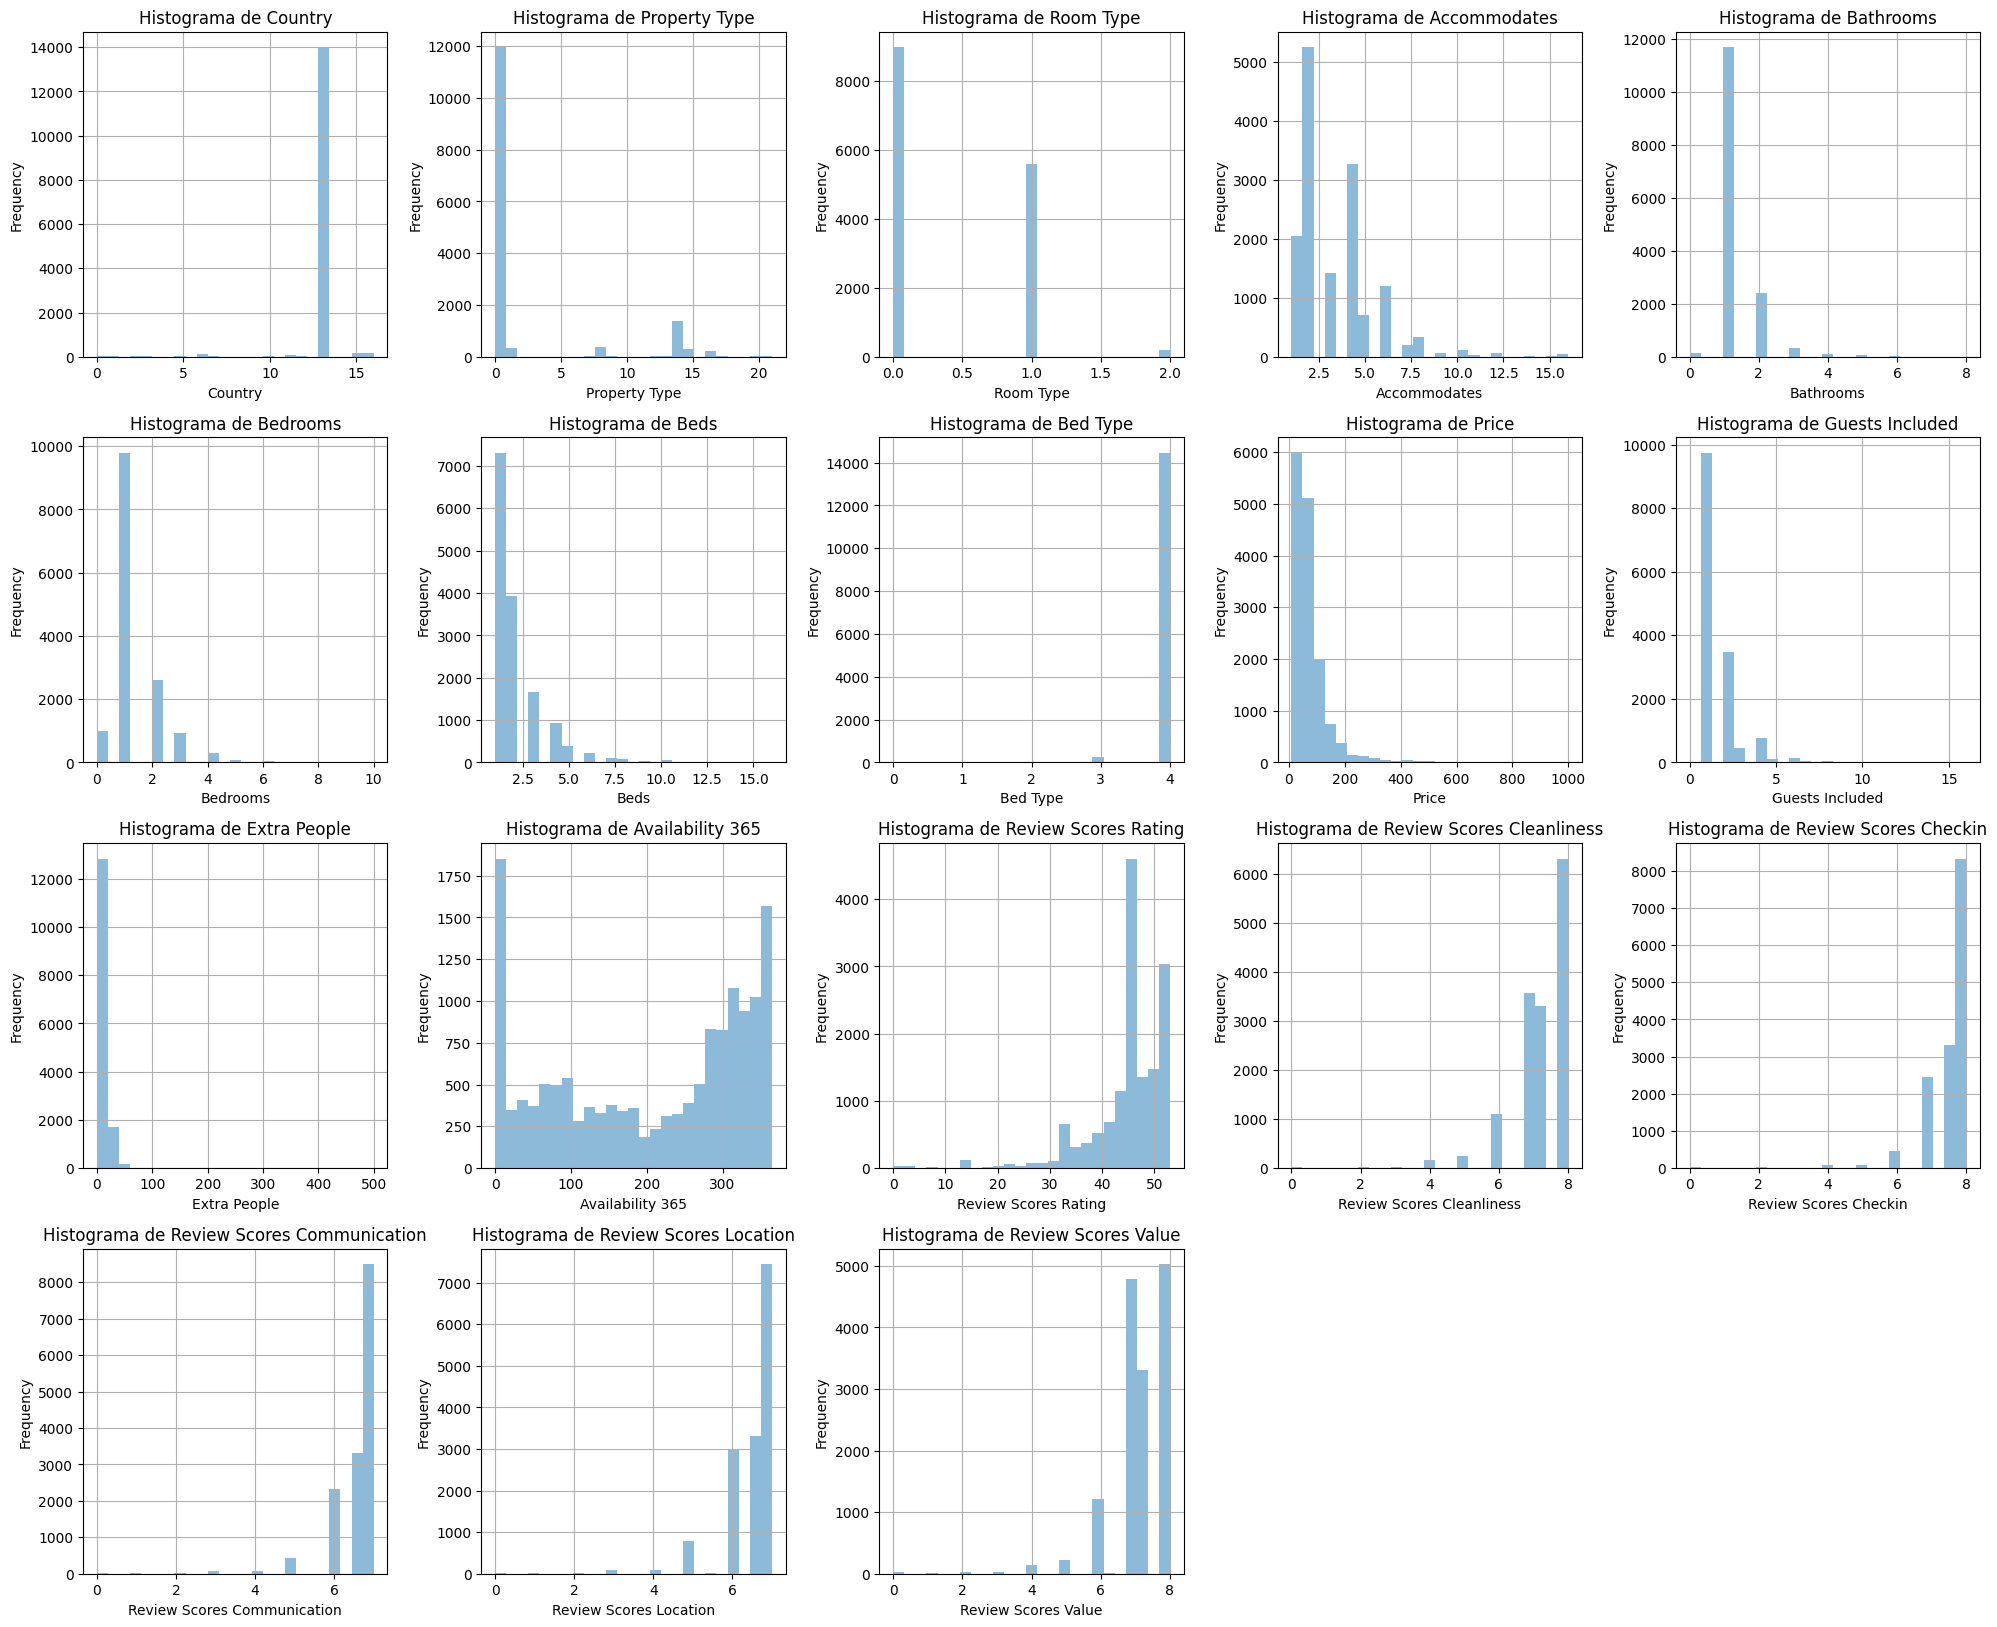

In [91]:
# Definir las columnas a graficar
columnas_a_graficar = [
    "Country", 
    "Property Type", "Room Type", "Accommodates", "Bathrooms", 
    "Bedrooms", "Beds", "Bed Type", "Price", "Guests Included", 
    "Extra People", "Availability 365", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

# Configurar la figura
plt.figure(figsize=(20, 20))

# Crear un histograma para cada columna
for i, column in enumerate(columnas_a_graficar):
    plt.subplot(5, 5, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    airbnb_drop[column].plot.hist(alpha=0.5, bins=25, grid=True)
    plt.xlabel(column)
    plt.title(f'Histograma de {column}')

plt.tight_layout()  # Ajustar el espaciado entre subgráficas
plt.show()

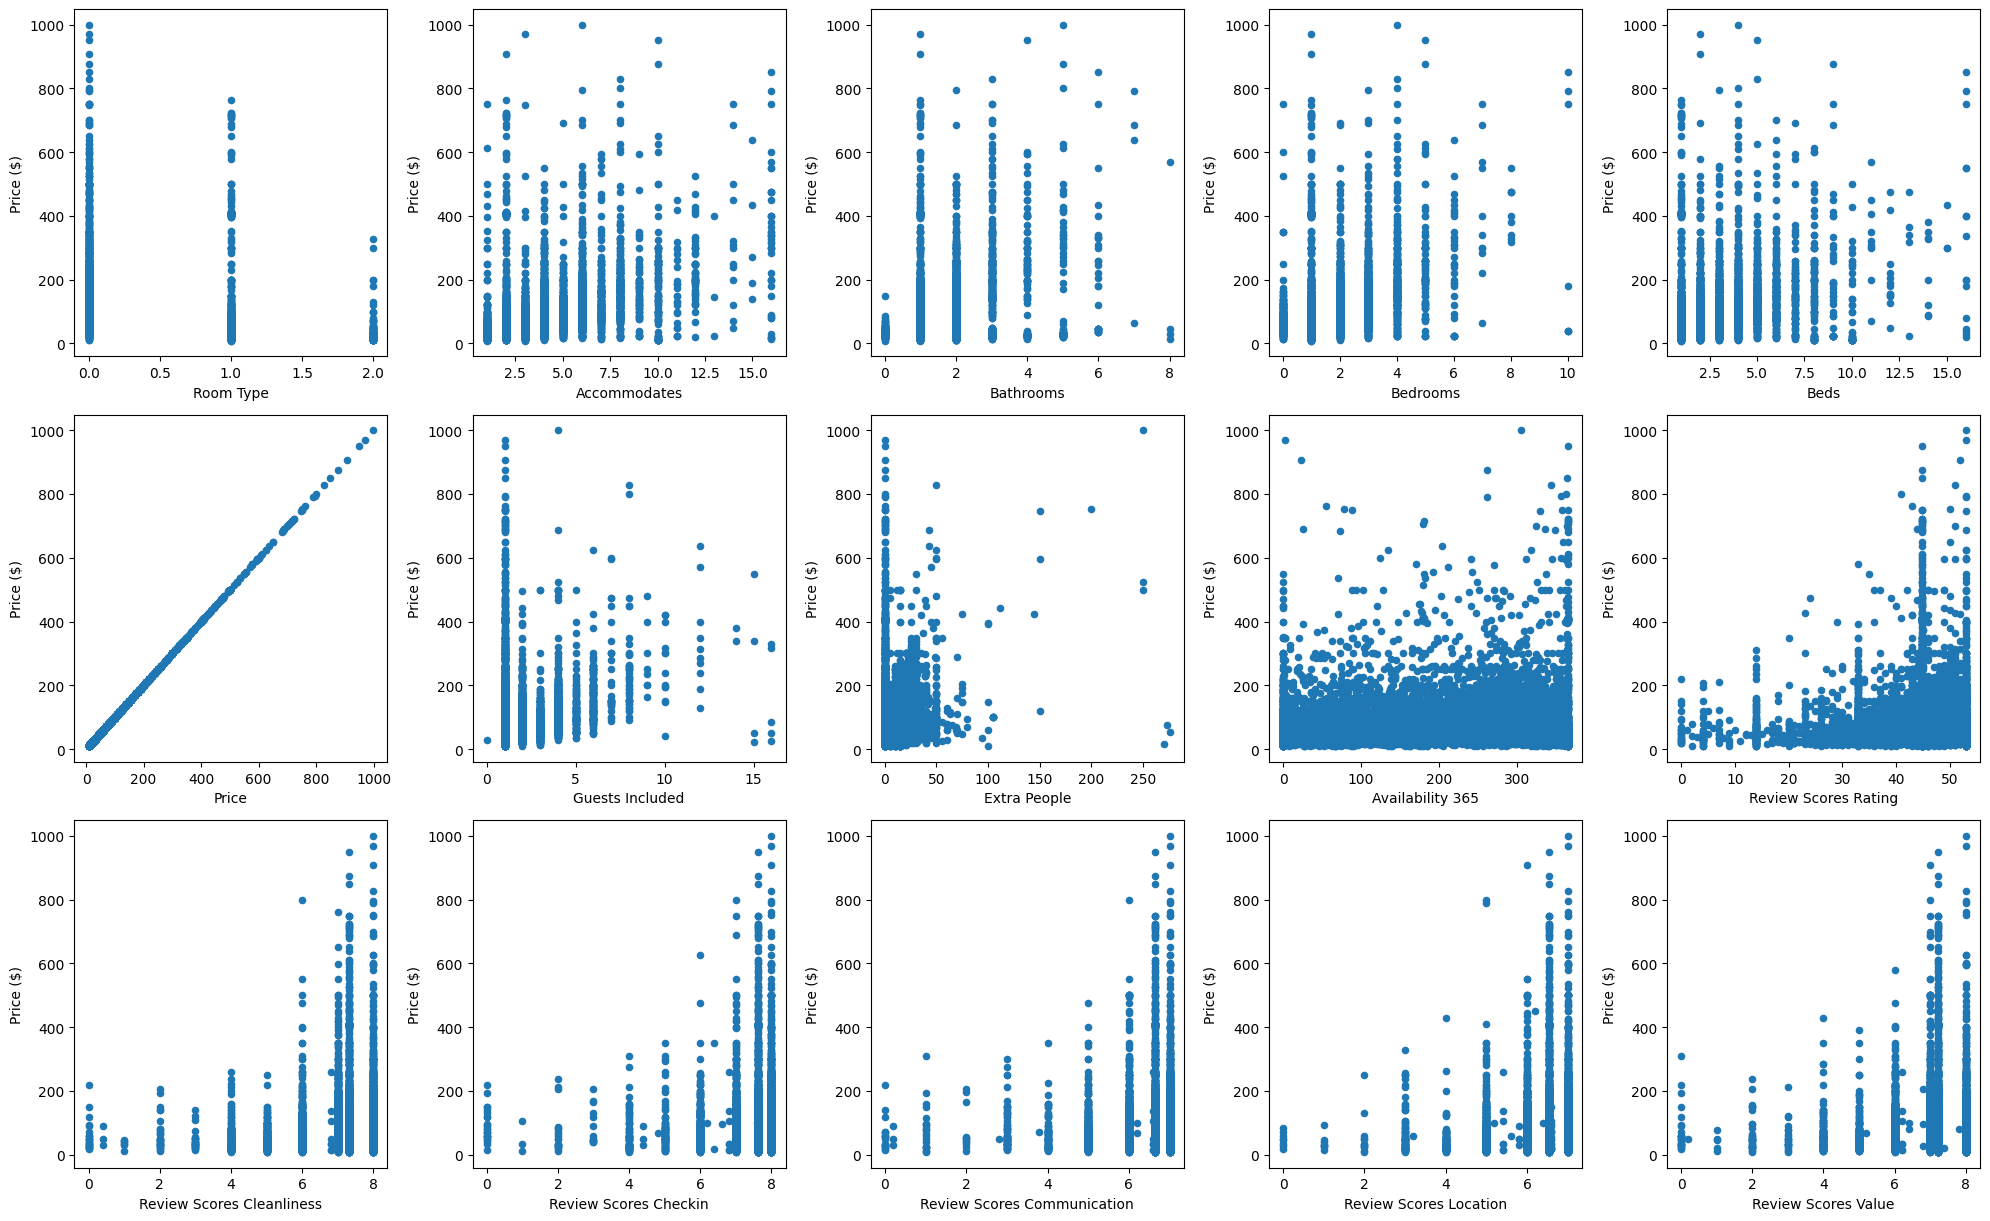

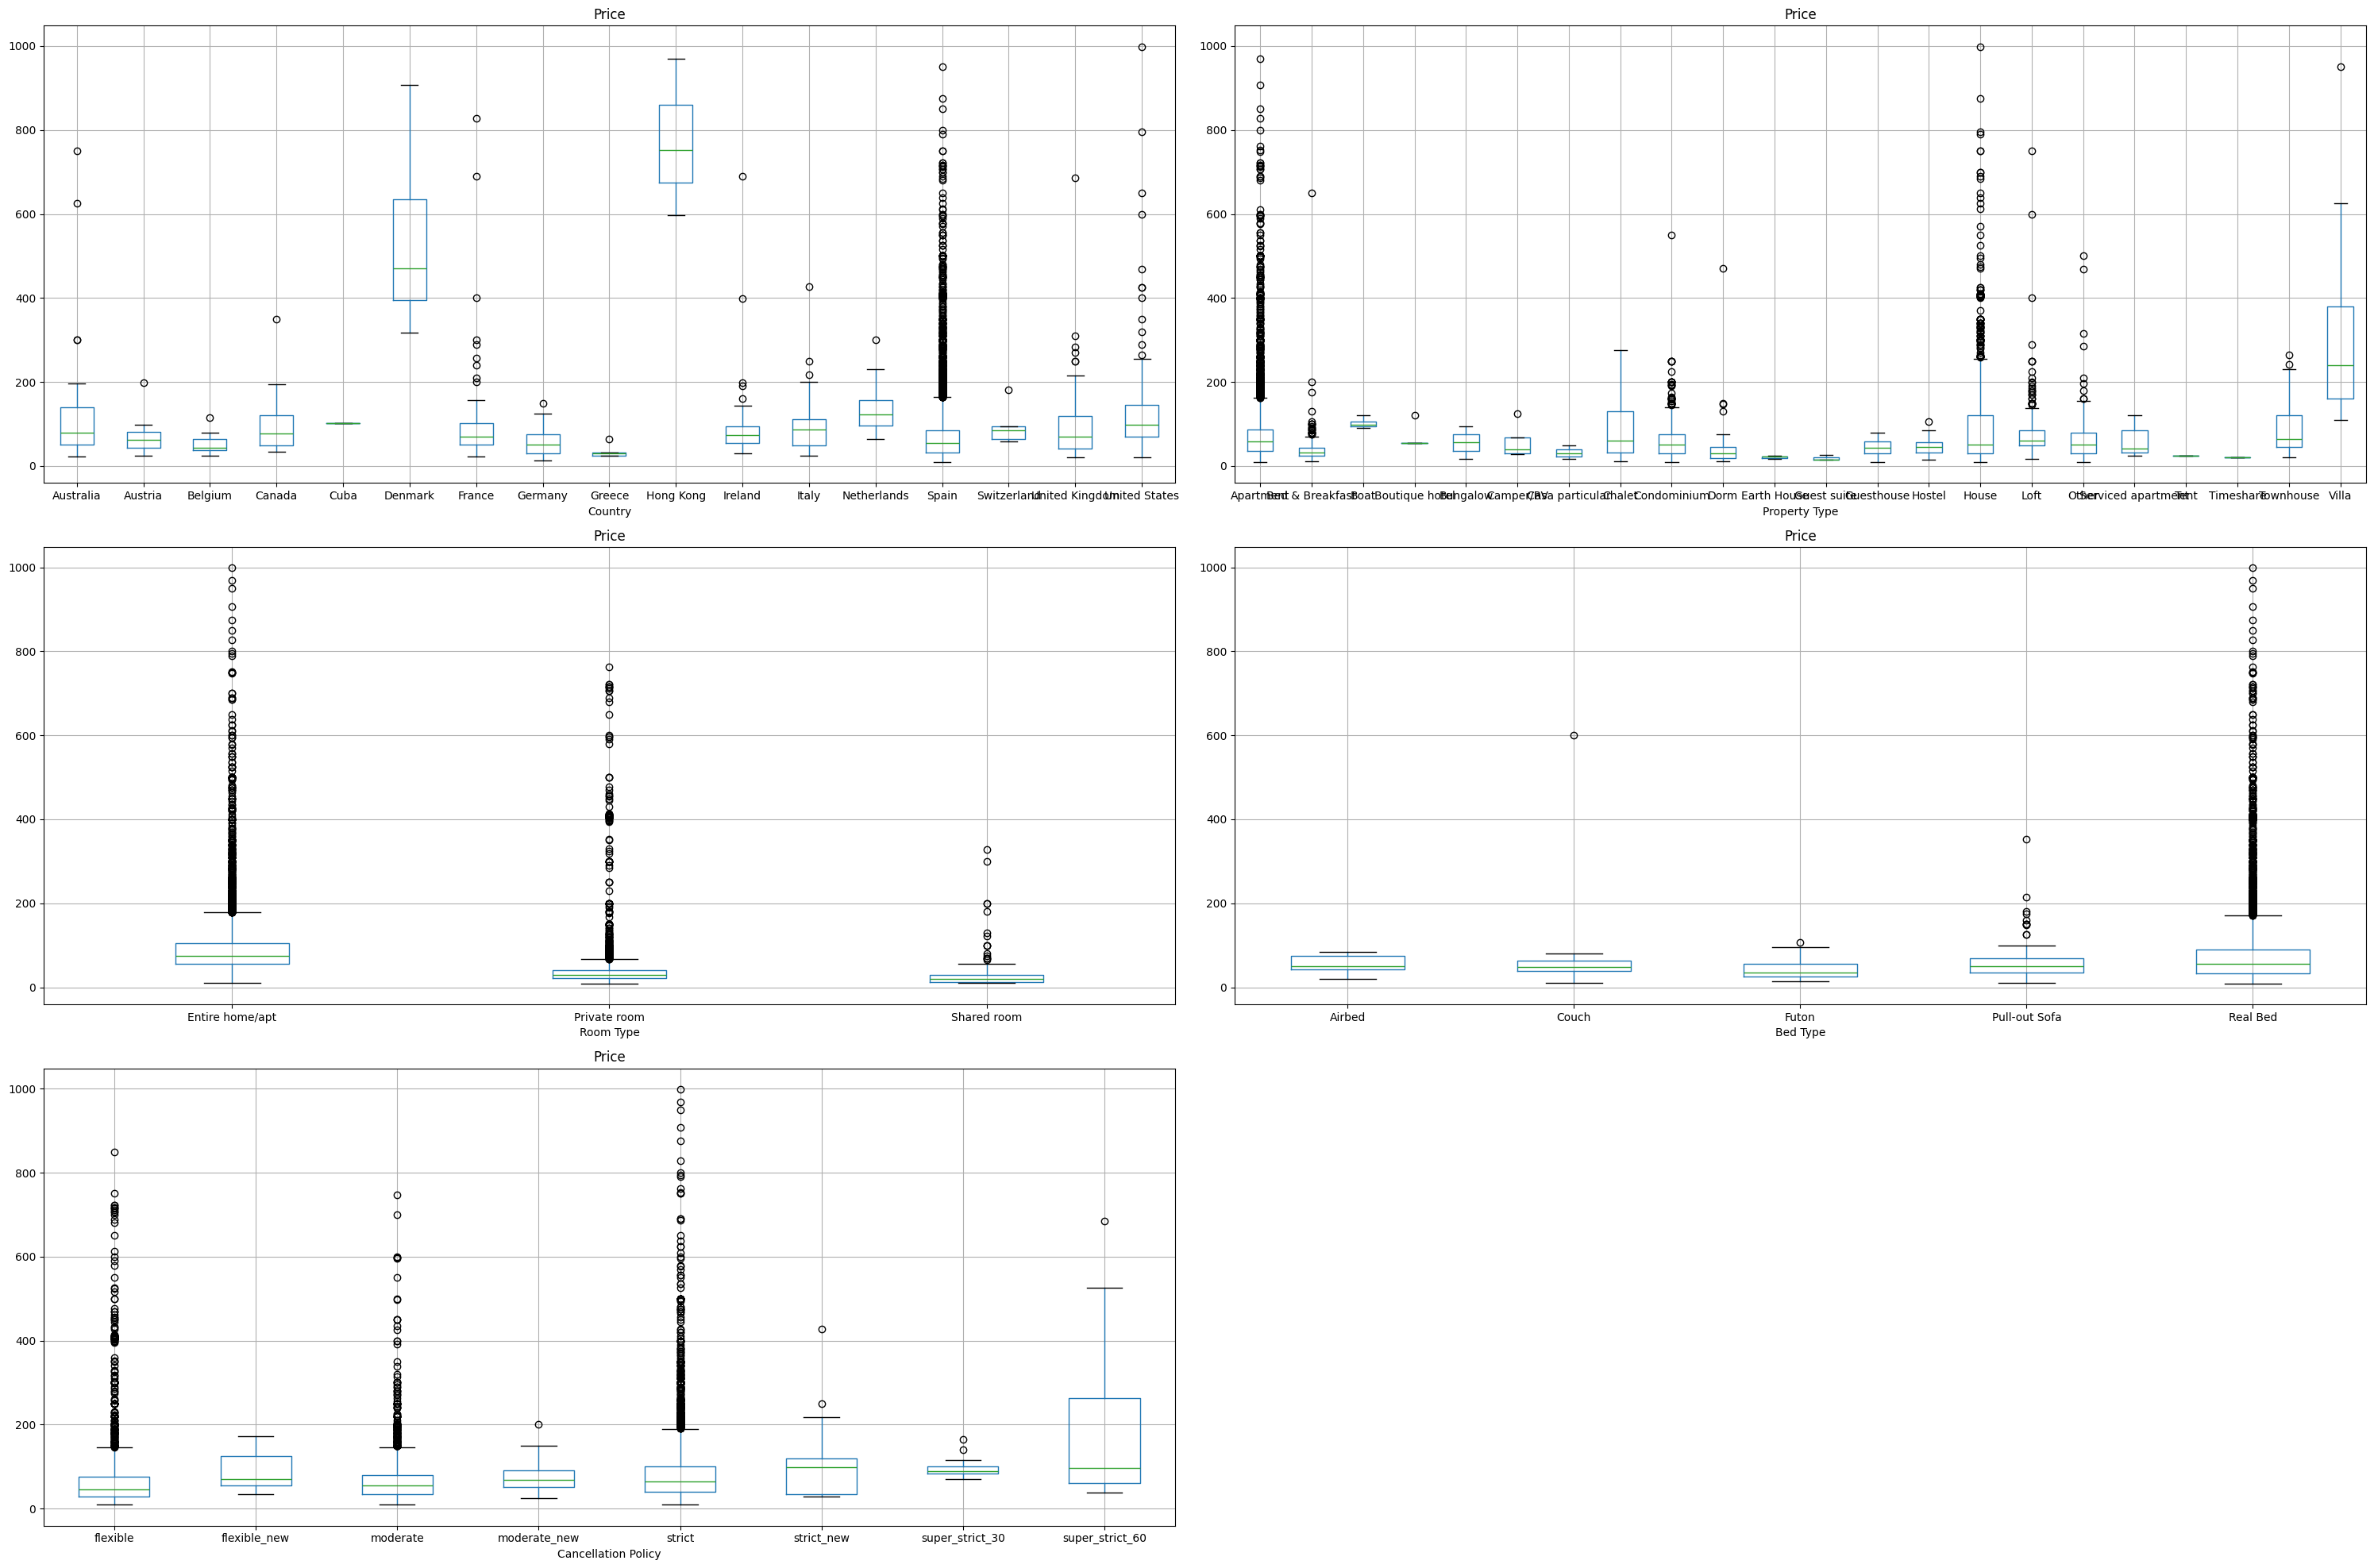

In [92]:
# Mostrar scatter plot de las variables
columnas_a_graficar = [
    "Room Type", "Accommodates", "Bathrooms", 
    "Bedrooms", "Beds", "Price", "Guests Included", 
    "Extra People", "Availability 365", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

plt.figure(figsize=(20, 20))


for i, column in enumerate(columnas_a_graficar):
    plt.subplot(5, 5, i + 1) 
    airbnb_drop.plot(kind='scatter', x=column, y='Price', ax=plt.gca()) 
    plt.xlabel(column)
    plt.ylabel('Price ($)')

plt.tight_layout()  
plt.show()  

#Mostrar boxplot de las variables categoricas
columnas_a_graficar_box = [
    "Country", 
    "Property Type", "Room Type", "Bed Type", "Cancellation Policy"
]

plt.figure(figsize=(30, 20))

for i, column in enumerate(columnas_a_graficar_box):
    plt.subplot(3, 2, i + 1) 
    airbnb.boxplot(by=column,column = 'Price', ax=plt.gca())
    plt.suptitle('')

plt.tight_layout()
plt.show()

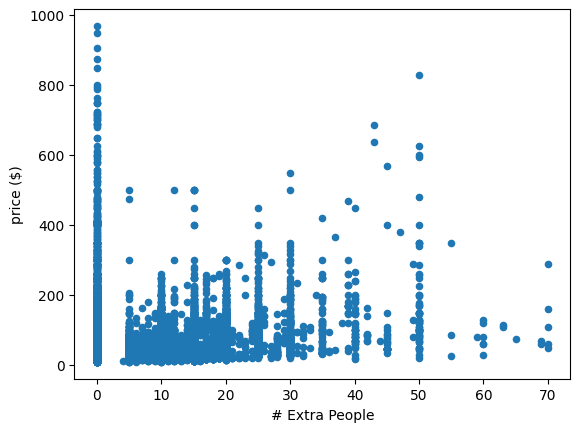

In [93]:
airbnb_no_outliers_bedrooms = airbnb_drop[airbnb_drop['Bedrooms'] <= 5]

airbnb_no_outliers_extra_people = airbnb_drop[airbnb_drop['Extra People'] <= 70]
airbnb_no_outliers_extra_people.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('# Extra People')
plt.ylabel('price ($)')
plt.show()

In [94]:
print(
    f'Original: {airbnb_drop.shape[0]} // '
    f'Modificado: {airbnb_no_outliers_extra_people.shape[0]}\nDiferencia: {airbnb.shape[0] - airbnb_no_outliers_extra_people.shape[0]}'
)
print(f'Variación: {((airbnb_drop.shape[0] - airbnb_no_outliers_extra_people.shape[0])/airbnb_drop.shape[0])*100:2f}%')

Original: 14780 // Modificado: 14742
Diferencia: 38
Variación: 0.257104%


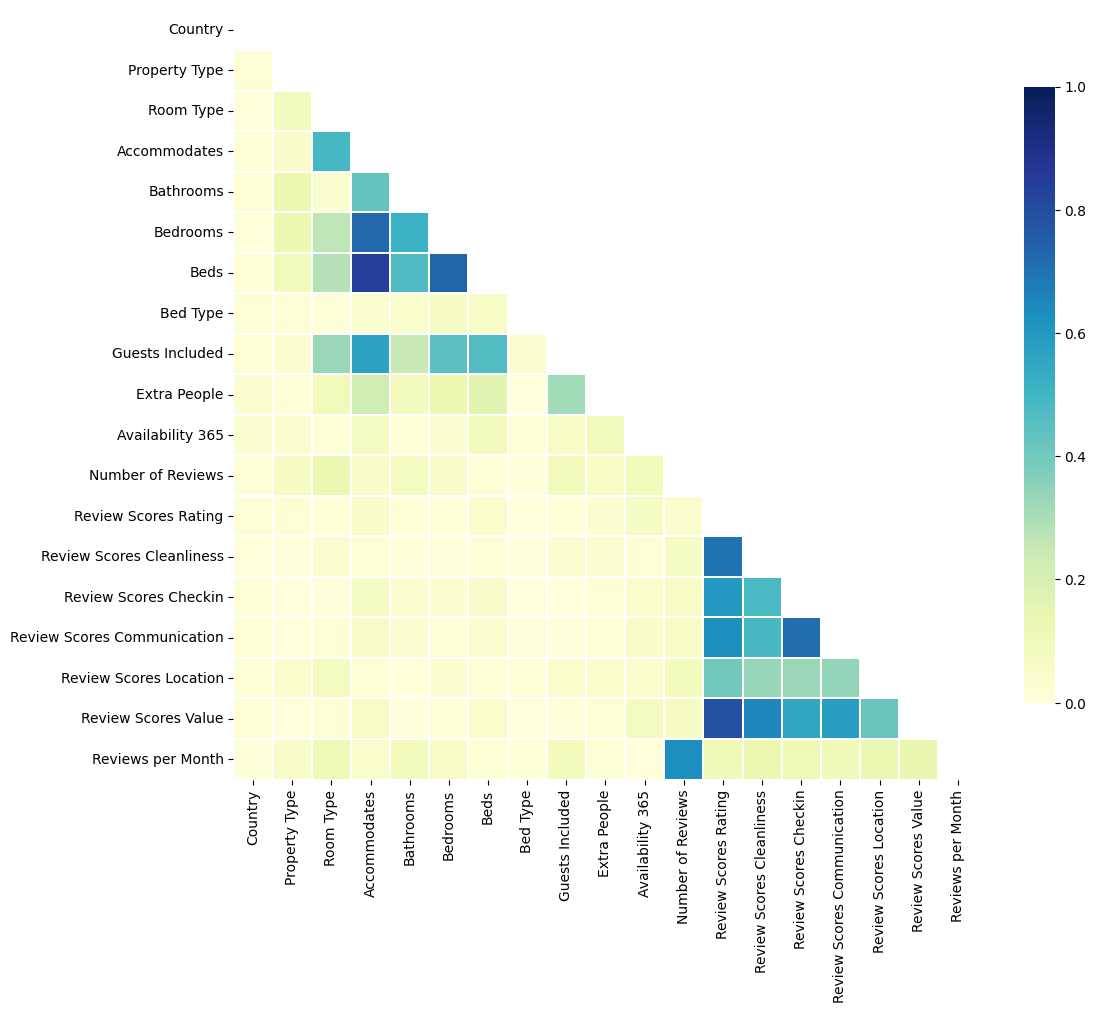

In [140]:
import seaborn as sns

# Compute the correlation matrix
#corr = np.abs(airbnb_drop.corr())
corr = np.abs(airbnb_drop.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [14]:
airbnb_drop.corr()

,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
Country,1.000000,0.012679,0.001888,0.009653,0.018758,0.001969,0.009074,0.011104,-0.047272,0.019160,-0.025862,0.038514,-0.012304,-0.012423,-0.000563,-0.009769,-0.008813,0.007847,-0.014594,0.004460
Property Type,0.012679,1.000000,0.088718,0.048900,0.131867,0.119758,0.093814,0.015297,0.086230,0.033628,0.011110,0.031795,-0.073903,0.017720,0.004876,0.002217,-0.003642,-0.041617,0.002182,-0.054362
Room Type,0.001888,0.088718,1.000000,-0.491561,-0.036381,-0.265693,-0.285149,-0.009544,-0.366734,-0.331199,-0.095575,0.015557,-0.123186,0.010447,-0.034144,0.003918,-0.019683,-0.076793,0.017196,-0.112774
Accommodates,0.009653,0.048900,-0.491561,1.000000,0.427581,0.723412,0.837126,0.037777,0.522288,0.569527,0.225316,0.078422,0.053389,-0.051856,-0.017609,-0.066862,-0.050003,0.013331,-0.055014,0.042874
Bathrooms,0.018758,0.131867,-0.036381,0.427581,1.000000,0.512357,0.470312,0.043547,0.379453,0.243269,0.087118,0.017320,-0.074712,0.011561,0.004418,-0.038195,-0.031776,0.003708,-0.006113,-0.087893
Bedrooms,0.001969,0.119758,-0.265693,0.723412,0.512357,1.000000,0.731142,0.070503,0.498095,0.442770,0.128459,0.033906,-0.049190,0.009076,0.006194,-0.026574,-0.011227,-0.024406,-0.010263,-0.060966
Beds,0.009074,0.093814,-0.285149,0.837126,0.470312,0.731142,1.000000,0.058732,0.441960,0.465265,0.162080,0.093421,0.012893,-0.041353,-0.015373,-0.049897,-0.036521,-0.018815,-0.045904,-0.015734
Bed Type,0.011104,0.015297,-0.009544,0.037777,0.043547,0.070503,0.058732,1.000000,0.032428,0.029994,-0.001542,0.020430,-0.006973,-0.003111,0.006402,0.000537,-0.005823,-0.014943,-0.002381,-0.011115
Price,-0.047272,0.086230,-0.366734,0.522288,0.379453,0.498095,0.441960,0.032428,1.000000,0.302348,0.140037,0.061258,-0.058546,0.051292,0.059510,-0.006137,0.006032,0.075244,0.012754,-0.095003
Guests Included,0.019160,0.033628,-0.331199,0.569527,0.243269,0.442770,0.465265,0.029994,0.302348,1.000000,0.315282,0.059002,0.095069,0.008203,0.030345,-0.000535,0.006831,0.039930,0.005143,0.090747


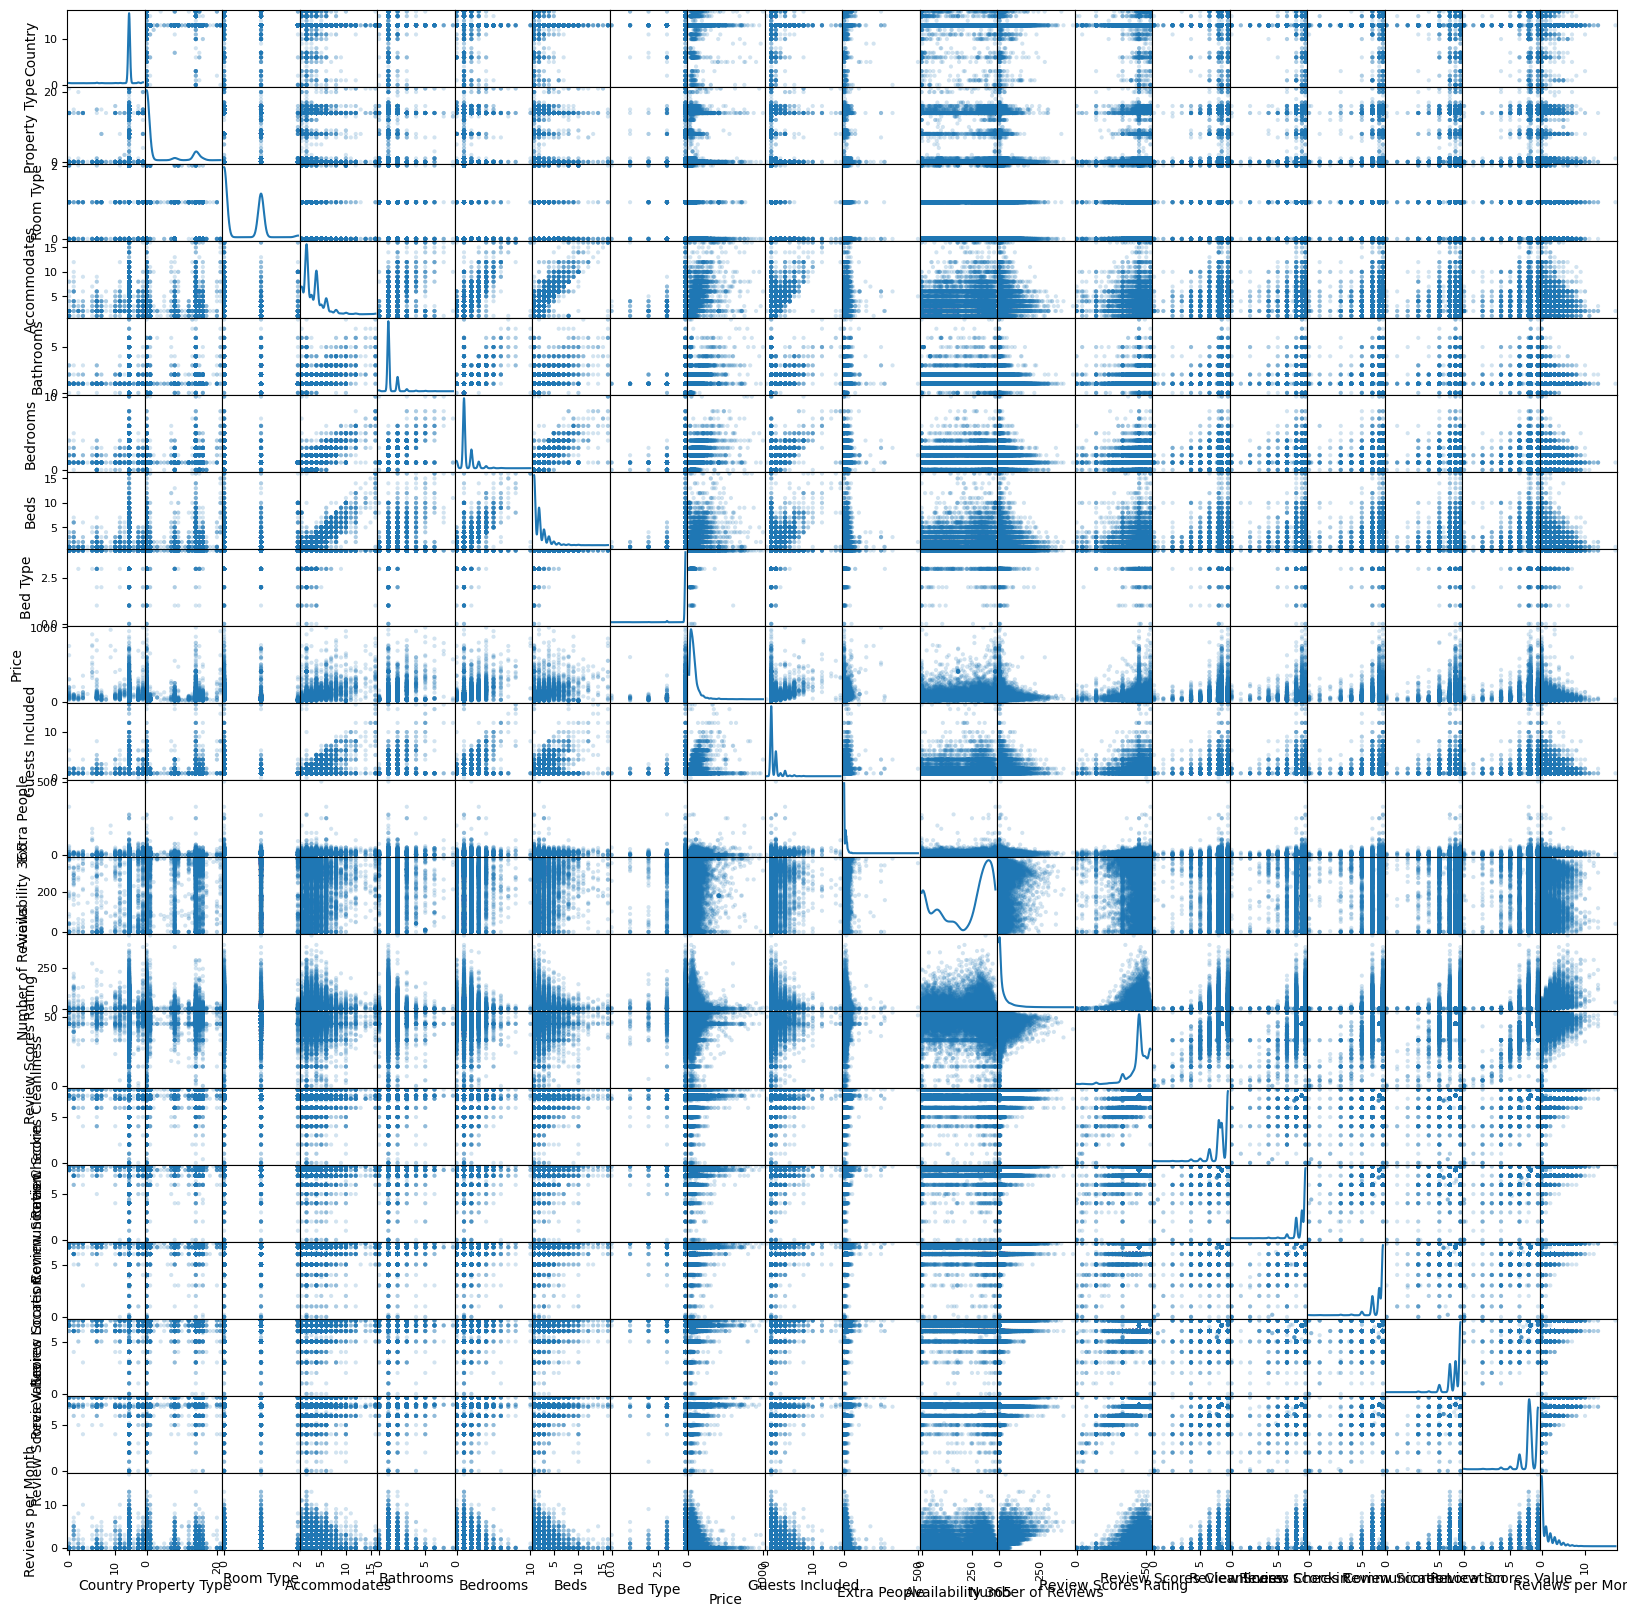

In [15]:
pd.plotting.scatter_matrix(airbnb_drop, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## Modelado

In [179]:
airbnb_drop = pd.read_csv("airbnb-listings-test.csv", header=0, sep=";", decimal=".")

airbnb_drop = airbnb.drop(["ID", "Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Host URL", "Host About", "Host Response Time",
                            "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules",
                            "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host Name", "Host Since",
                            "Host Location", "Host Thumbnail Url", "Host Neighbourhood", "Host Verifications", "Street",
                            "Neighbourhood", "Neighbourhood Cleansed", "State", "Country Code", "Latitude", "Longitude",
                            "Square Feet", "Weekly Price", "Monthly Price", "Has Availability", "Calendar last Scraped", "First Review",
                            "First Review", "Last Review", "License", "Jurisdiction Names", "Geolocation", "Neighbourhood",
                            "Host Picture Url", "Availability 30", "Availability 60", "Availability 90", "Review Scores Accuracy",
                            "Host Acceptance Rate", "Smart Location", "Zipcode", "City", "Amenities", "Calendar Updated", "Security Deposit",
                            "Host Listings Count", "Cleaning Fee", "Calculated host listings count", "Features", "Market", "Neighbourhood Group Cleansed",
                            "Host Response Rate", "Experiences Offered", "Minimum Nights", "Maximum Nights", "Host Total Listings Count"
                            ,"Cancellation Policy"], axis=1)

#uso del label encoder para transformar los objetos

from sklearn import preprocessing
# Procesar cada columna y almacenar el LabelEncoder
for column in ["Country", "Room Type", "Property Type", "Bed Type", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", "Review Scores Communication",
               "Review Scores Location", "Review Scores Value"]:
    le = preprocessing.OrdinalEncoder()
    airbnb_drop[column] = le.fit_transform(airbnb_drop[[column]])  # Usar doble corchete para mantener el formato DataFrame
    
# Rellenamos los datos faltantes
from sklearn.impute import KNNImputer

# Asegúrate de que las columnas sean numéricas
columnas_a_imputar = ["Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

# Convertir las columnas a numéricas, forzando errores a NaN
airbnb_drop[columnas_a_imputar] = airbnb_drop[columnas_a_imputar].apply(pd.to_numeric, errors='coerce')

### Imputar los valores faltantes
imputer = KNNImputer()
airbnb_drop[columnas_a_imputar] = imputer.fit_transform(airbnb_drop[columnas_a_imputar])
#
## Rellenar "Reviews per Month"
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].fillna(0)
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].astype(int)

airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].fillna(airbnb_drop["Bathrooms"].median())
airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].astype(int)

airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].fillna(airbnb_drop["Bedrooms"].median())
airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].astype(int)

airbnb_drop["Beds"] = airbnb_drop["Beds"].fillna(airbnb_drop["Beds"].median())
airbnb_drop["Beds"] = airbnb_drop["Beds"].astype(int)

airbnb_drop["Country"] = airbnb_drop["Country"].fillna(airbnb_drop["Country"].median())
airbnb_drop["Country"] = airbnb_drop["Country"].astype(int)

airbnb_drop["Price"] = airbnb_drop["Price"].fillna(airbnb_drop["Price"].mean())
airbnb_drop["Price"] = airbnb_drop["Price"].astype(int)

y= airbnb_drop["Price"]
X = airbnb_drop.drop(columns=["Price"]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)


Datos entrenamiento:  (11085, 19)
Datos test:  (3695, 19)


#### Normalizamos los datos

In [130]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [131]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11085, 19)
Datos test:  (3695, 19)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................

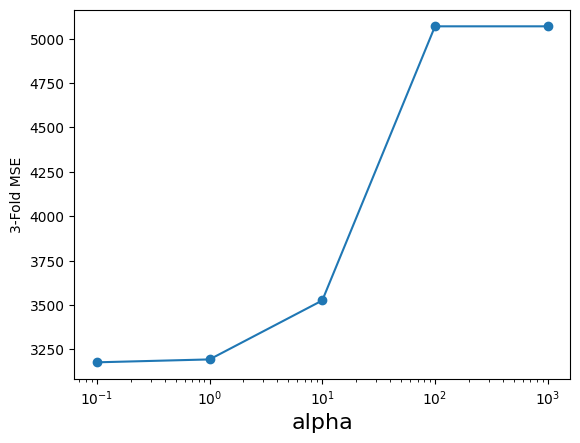

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,3,5)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [152]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnb_drop.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.15e+03
MSE Modelo Lasso (test) : 3.51e+03
RMSE Modelo Lasso (train): 56.1
RMSE Modelo Lasso (test) : 59.3
Property Type -3.8780175652764735
Room Type 2.4581757389667973
Accommodates -15.412458711932343
Bathrooms 18.51947524928597
Bedrooms 12.442641995673158
Beds 13.138826958448554
Bed Type -3.8849424146020755
Price 0.0
Guests Included -0.6699280554122367
Extra People 1.0058467853511246
Availability 365 3.1156315211789885
Number of Reviews -1.30505024789823
Review Scores Rating 5.253231643982024
Review Scores Cleanliness 2.602001535376702
Review Scores Checkin -1.1819675674652232
Review Scores Communication -0.9107489787181963
Review Scores Location 4.2579550759059925
Review Scores Value -2.7491370588853035
Reviews per Month -7.227688993158797


In [146]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.2s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.4s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.7s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.5s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  10.0s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.8s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.8s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  13.1s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  13.2s
[CV] END ...............learning_rate=0.1, n_esti

In [174]:
from xgboost import XGBRegressor

bt = XGBRegressor(random_state=0, max_depth=5, learning_rate=0.09, n_estimators=500)
bt.fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

Train:  0.8011388182640076
Test:  0.5630689859390259


In [175]:
from lightgbm import LGBMRegressor

bt = LGBMRegressor(random_state=0, max_depth=5,learning_rate=0.09, n_estimators=500)
bt.fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 11085, number of used features: 19
[LightGBM] [Info] Start training from score 73.284980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 